# **First python project - Are you golden?**
Noam Levi Avshalom

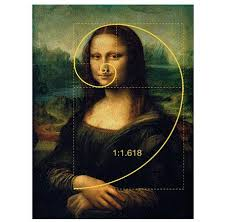
---



---







# **Game purpose** 
 1.Detect your face and eyes using OpenCV.
 2. tell you how far are you from the golden cut
 3. find you an animal or person who has the same golden features as you



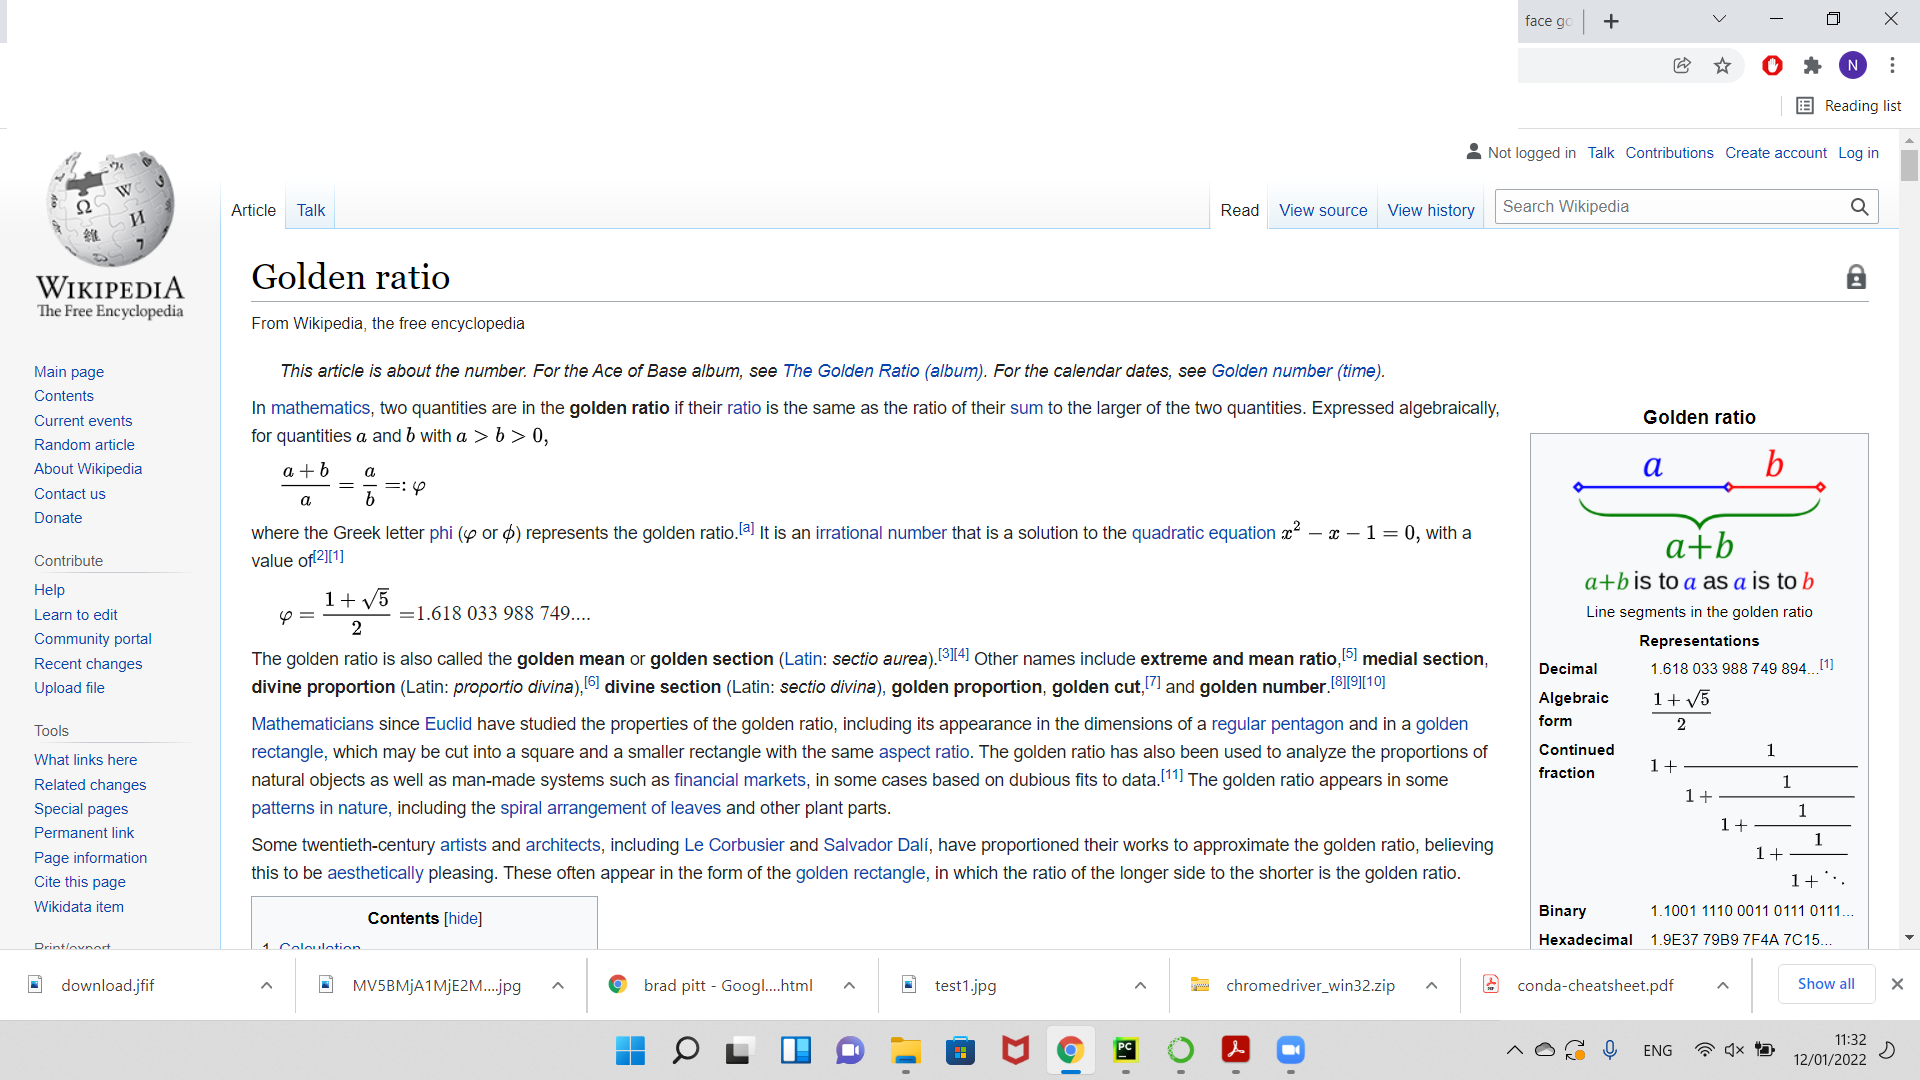

#Package Installation 

I installed opencv locally on my terminal using conda. In addition I installed according to peoples recommendations since opencv is written in C++ but I'm not sure it was required.
All  of the codes were written for local use an were tested only there


In [ ]:
#pip install opencv 
#pip install dataclasses
import os
import requests as req
#import cv2
#from dataclasses import dataclass, field


[link text](https:// [link text](https:// [link text](https:// [link text](https://))))# The golden cut of the face is taken from several cooardinates, I will use only the vertex, chin and two frontal side edges
 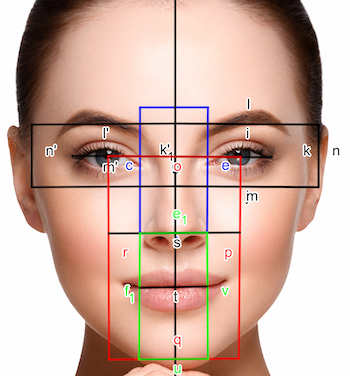

It was nice and easy to open the camera!

---



In [ ]:
#open local camera
cap = cv2.VideoCapture (0 )
cap.set (1,640) #There are possibiliteis to play with camera attr (size, brightness, color, etc..)
while True:
    success, image =cap.read() # success is just for testing
    cv2.imshow("video", image)
    if cv2.waitKey(1) & 0xFF == ord('q'): # exit button
        break

But Where do I go next?
I've searched and found a relitively simple ML feature in opencv

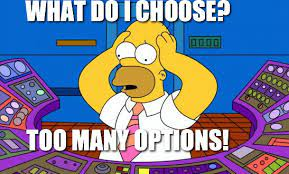

### ***CascadeClassifier*** - Cascading is a particular case of ensemble learning based on the concatenation of several classifiers, using all information collected from the output from a given classifier as additional information for the next classifier in the cascade. Unlike voting or stacking ensembles, which are multiexpert systems, cascading is a multistage one.



### Using the app was very simple, you can either use premade XML cascades or train some by yourself!

# [multiple cascades:](https://github.com/Itseez/opencv/tree/master/data/haarcascades//)

This code was taken from https://pythonprogramming.net/haar-cascade-face-eye-detection-python-opencv-tutorial/ and used for face and eye detection

Eye detection using OPENCV - Should be saved as XML file - look in https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_eye.xml 


---




In [ ]:
# Changed to work on my system

import numpy as np
import cv2

#Training with xml files
cascPath = r"C:\Users\noaml\PycharmProjects\SET\resources\haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascPath)
eyePath =r"C:\Users\noaml\AppData\Roaming\JetBrains\PyCharmCE2021.3\scratches\haarcascade_eye.xml"
eye_cascade = cv2.CascadeClassifier(eyePath)

#Open Camera
video_capture = cv2.VideoCapture(0)

while True:
    
    ret, img = video_capture.read() # Capture frame-by-frame and number

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #it operate better on gray

    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.5,
        minNeighbors=5,
        minSize=(30, 30),
        flags=cv2.CASCADE_SCALE_IMAGE
    )

    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = img[y:y + h, x:x + w]

        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

    cv2.imshow('img', img)
    if cv2.waitKey(1) & 0xFF == ord('q'):#shut down on q  
        break

video_capture.release()
cv2.destroyAllWindows()

## **I even found a way to train object detection by myself!!**

So I Used **icrawler** to fetch images - I will try green apple! 

In [ ]:
from icrawler.builtin import BingImageCrawler, GoogleImageCrawler #google didn't work and I had to use selenium

my_search = ['green apple']
number = 100
for c in my_search:
    BingImageCrawler = BingImageCrawler(storage={'root_dir': f'p/{c.replace(" ", ".")}'}) #root dir created  a new folser root_dir.. lol
    BingImageCrawler.crawl(keyword=c, filters=None, max_num=100, offset=0)

Bing was not good enough for me, and chrome had to be much more complicated... this code is not mine but it uses selenium package 

In [ ]:
import os
import time
import requests
from selenium import webdriver

def fetch_u(query: str, max_links_to_fetch: int, wd: webdriver, sleep_between_interactions: int = 1):
    def scroll_to_end(wd):
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_between_interactions)

        # build the google query

    search_url = f"https://www.google.com/search?safe=off&site=&tbm=isch&source=hp&q={query}&oq={query}&gs_l=img"

    # load the page
    wd.get(search_url)

    image_urls = set()
    image_count = 0
    results_start = 0
    while image_count < max_links_to_fetch:
        scroll_to_end(wd)

        # get all image thumbnail results
        thumbnail_results = wd.find_elements_by_css_selector("img.Q4LuWd")
        number_results = len(thumbnail_results)

        print(f"Found: {number_results} search results. Extracting links from {results_start}:{number_results}")

        for img in thumbnail_results[results_start:number_results]:
            # try to click every thumbnail such that we can get the real image behind it
            try:
                img.click()
                time.sleep(sleep_between_interactions)
            except Exception:
                continue

            # extract image urls
            actual_images = wd.find_elements_by_css_selector('img.n3VNCb')
            for actual_image in actual_images:
                if actual_image.get_attribute('src') and 'http' in actual_image.get_attribute('src'):
                    image_urls.add(actual_image.get_attribute('src'))

            image_count = len(image_urls)

            if len(image_urls) >= max_links_to_fetch:
                print(f"Found: {len(image_urls)} image links, done!")
                break
        else:
            print("Found:", len(image_urls), "image links, looking for more ...")
            time.sleep(30)
            return
            load_more_button = wd.find_element_by_css_selector(".mye4qd")
            if load_more_button:
                wd.execute_script("document.querySelector('.mye4qd').click();")

        # move the result startpoint further down
        results_start = len(thumbnail_results)

    return image_urls
def persist_image(folder_path:str,url:str, counter):
    try:
        image_content = requests.get(url).content

    except Exception as e:
        print(f"ERROR - Could not download {url} - {e}")

    try:
        f = open(os.path.join(folder_path, 'jpg' + "_" + str(counter) + ".jpg"), 'wb')
        f.write(image_content)
        f.close()
        print(f"SUCCESS - saved {url} - as {folder_path}")
    except Exception as e:
        print(f"ERROR - Could not save {url} - {e}")


def search_and_download(search_term: str, driver_path: str, target_path='./images', number_images=10):
    target_folder = f'root_dir/p/{search_term.lower().replace(" ", ".")}'
     #target_folder = {'root_dir': f'p/{c.replace(" ", ".")}'}
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    with webdriver.Chrome(executable_path=r'C:\Users\noaml\PycharmProjects\SET\resources\chromedriver.exe') as wd:
        res = fetch_image_urls(search_term, number_images, wd=wd, sleep_between_interactions=0.5)

    counter = 0
    for elem in res:
        persist_image(target_folder, elem, counter)
        counter += 1

DRIVER_PATH = r'C:\Users\noaml\PycharmProjects\SET\resources\chromedriver.exe'
search_term = 'people on webcam'
# num of images you can pass it from here  by default it's 10 if you are not passing
number_images = 100
search_and_download(search_term=search_term,driver_path=DRIVER_PATH,number_images = 100 )

Then I renamed the photos - os package is used

In [ ]:
# Function to rename multiple files
def main(folder='x'):
    
    for count, filename in enumerate(os.listdir(folder)):
        dst = f"{str(count)}__.jpg"
        src = f"{folder}/{filename}"  
        dst = f"{folder}/{dst}"

        os.rename(src, dst)

    main('root_dir\p\green.apple/n')


**And trained it using "Cascade-Trainer-GUI"** - And when it was ready...

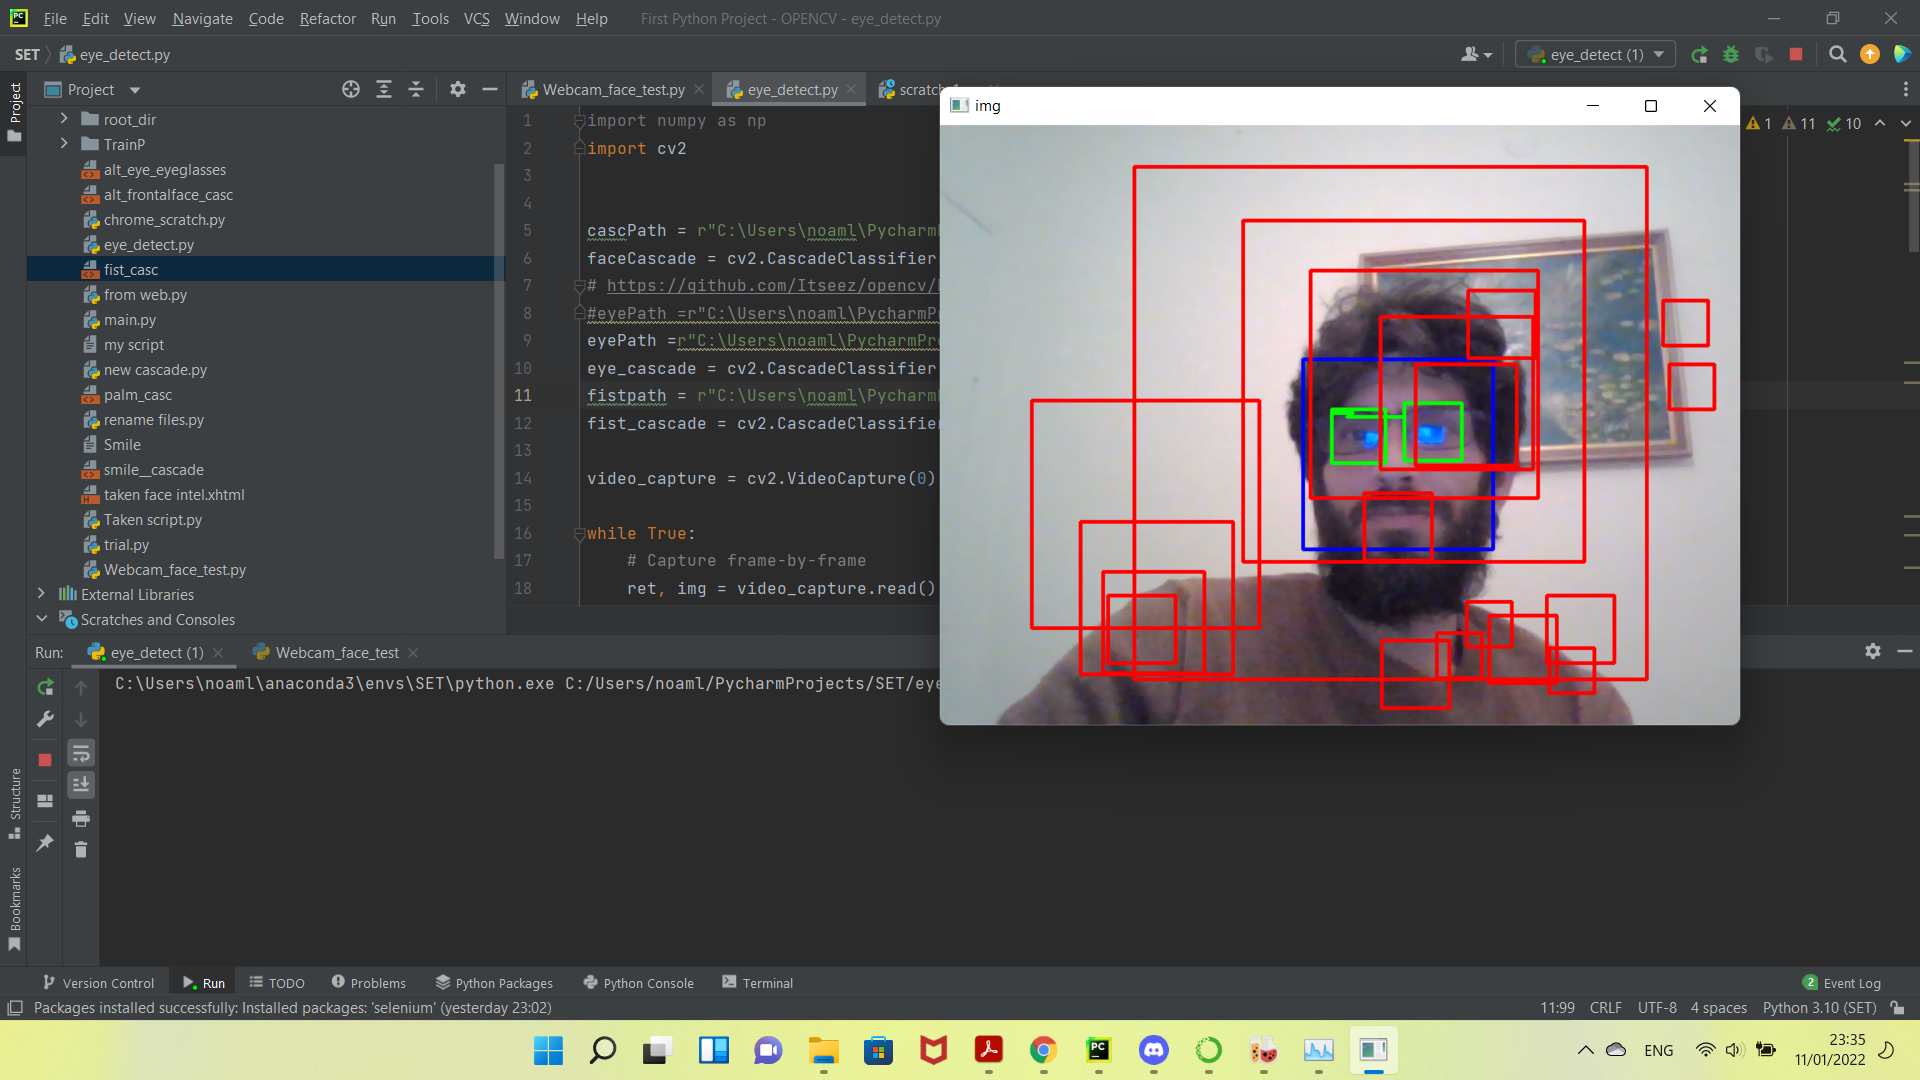

### And off course after spending more than a day on irrelevant things it didnt work and I used a pre built cascade



In [ ]:
#This is not the full XML
<?xml version="1.0"?>
<opencv_storage>
<cascade type_id="opencv-cascade-classifier"><stageType>BOOST</stageType>
  <featureType>HAAR</featureType>
  <height>18</height>
  <width>36</width>
  <stageParams>
    <maxWeakCount>53</maxWeakCount></stageParams>
  <featureParams>
    <maxCatCount>0</maxCatCount></featureParams>
  <stageNum>20</stageNum>
  <stages>
    <_>
      <maxWeakCount>11</maxWeakCount>
      <stageThreshold>-1.2678639888763428e+00</stageThreshold>
      <weakClassifiers>
        <_>

## **I added instruction at the top of the screen and added the trained gesture to break the message and snap 3 images to have an avg**




In [ ]:
# Path of xml training cascades on my local system

ascPath = r"C:\Users\noaml\PycharmProjects\SET\alt_frontalface_casc"
faceCascade = cv2.CascadeClassifier(cascPath)
eyePath = r"C:\Users\noaml\PycharmProjects\SET\alt_eye_eyeglasses"
eye_cascade = cv2.CascadeClassifier(eyePath)
fistpath = r"C:\Users\noaml\PycharmProjects\SET\fist_casc"
fist_cascade = cv2.CascadeClassifier(fistpath)
font = cv2.FONT_HERSHEY_SIMPLEX  # font
#features for line
org = (20, 30)  # org
fontScale = 0.8  # fontScale
color = (255, 0, 0)  # Blue color in BGR
thickness = 1  # Line thickness of 1 px

video_capture = cv2.VideoCapture(0) # open Camera
gest = True
while True:
    # Capture frame-by-frame
    ret, img = video_capture.read()

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.5,
        minNeighbors=5,
        minSize=(30, 30),
        flags=cv2.CASCADE_SCALE_IMAGE
    )
    if gest:
        img = cv2.putText(img, f'Are you golden? To find out, raise your fist!', org, font, fontScale, color,
                      thickness, cv2.LINE_AA)
    else:
        break

    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = img[y:y + h, x:x + w]

        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
            cv2.line(roi_color, (ex, ew), (ey, eh), (0, 255, 0), 2)

    fist = fist_cascade.detectMultiScale(
        gray,
        scaleFactor=1.5,
        minNeighbors=5,
        minSize=(30, 30),
        flags=cv2.CASCADE_SCALE_IMAGE
    )
    for (fx, fy, fw, fh) in fist:
        cv2.rectangle(img, (fx, fy), (fx + fw, fy + fh), (0, 0, 255), 2)
        test_images =('test_1',)
        for i in range (3):
            test_img = cv2.imwrite(f'test_{i}.jpg', img)
            i +=1
            test_images += (f'test_{i}.jpg',)
        gest = False
 
    cv2.imshow('img', img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video_capture.release()
cv2.destroyAllWindows()



#Then 3 images were taken to the class I built the "@Gold_test"
 

In [ ]:
@dataclass
class Gold_test:
    test: tuple

    def are_you_gold(self):
        for ind, pic in enumerate(self.test):
            test_image_path =r'your path{pic}'
            test_img = cv2.imread(test_image_path)
            gray_p = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
            face = faceCascade.detectMultiScale(
                gray_p,
                scaleFactor=1.5,
                minNeighbors=5,
                minSize=(30, 30),
                flags=cv2.CASCADE_SCALE_IMAGE
            )

            for (x, y, w, h) in face:
                cv2.rectangle(test_img, (x, y), (x + w, y + h), (255, 0, 0), 2)
                roi_gray_p = gray_p[y:y + h, x:x + w]
                roi_color_p = test_img[y:y + h, x:x + w]
                n_img = cv2.line(roi_color_p, (x, n_y), (x + w, n_y), (0, 255, 0), 2)
                ratio = (h - y) / (x - w)
                if ratio > 1.5 or ratio > 1.8 :
                    print(f'you are not golden! {abs(ratio)}')
                else:
                    print (f'Wow You are Golden!')

                eyes = eye_cascade.detectMultiScale(roi_gray_p )
                for (ex, ey, ew, eh) in eyes:
                    cv2.rectangle(n_img, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
                    cv2.line(n_img, (ex,ey), (ex+ew,ey), (30, 0, 0), 2)


test_images = Gold_test(test = ('test_1','test_2', 'test_3'))
test_images.are_you_gold()


## after I saw the message that "I am not golden??" , I understood something had to be wrong in the game.. 

 **so to the adjust my scale, I used my control group to create a factor**

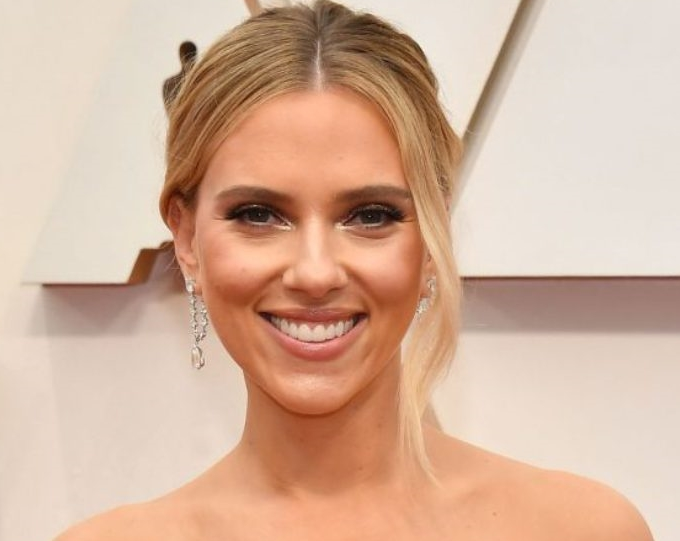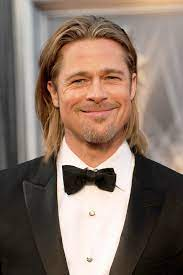

In [ ]:

@dataclass
class Gold_test:
    test: tuple

    def are_you_gold(self):
      for ind, pic in enumerate(self.test):
            test_image_path =pic
            test_img = cv2.imread(test_image_path)
            gray_p = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
            face = faceCascade.detectMultiScale(
            gray_p,
                scaleFactor=1.5,
                minNeighbors=5,
                minSize=(30, 30),
                flags=cv2.CASCADE_SCALE_IMAGE
                )

        for (x, y, w, h) in face:
            cv2.rectangle(test_img, (x, y), (x + w, y + h), (255, 0, 0), 2)
            roi_gray_p = gray_p[y:y + h, x:x + w]
            roi_color_p = test_img[y:y + h, x:x + w]
            n_y = y + 10

            
            n_img = cv2.line(roi_color_p, (x, n_y), (x + w, n_y), (0, 255, 0), 2)

            eyes = eye_cascade.detectMultiScale(roi_gray_p )
            for (ex, ey, ew, eh) in eyes:
                cv2.rectangle(n_img, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
                cv2.line(n_img, (ex,ey), (ex+ew,ey), (30, 0, 0), 2)
        
        def fact (self):
            ratio = (h - y) / (x - w)
            factor= ratio /1.618
            c_rat= float(factor) * ratio
            ratio=(h-y)/ (x-w)
            print (f'the factor is: {abs(factor)}')


brad ='C:\Users\noaml\PycharmProjects\SET\root_dir\p\brad.jpg'
scarlet ='C:\Users\noaml\PycharmProjects\SET\root_dir\p\scarlet.png'
test_images = Gold_test(test = ('brad','scarlet'))
test_images.are_you_gold()

## **And Still, I am not golden!**
I Gusee I'll have To accept the truth!

But it was fun playing with it! 